# Euro 2024 Match Analysis

In this Jupyter Lab notebook, we will dive into the analysis for every match of Euro 2024. The primary focus will be on team performance metrics such as ball possession, goals, and other statistical categories. By visualizing these metrics, we can compare and contrast the performance of different teams during each match.

The plot presented below showcases a detailed comparison between two teams, using the following key categories:

- **Ball Possession:** Percentage of time each team controlled the ball.
- **XGoals (Expected Goals):** The predicted number of goals based on shot quality and location.
- **Total Shots:** The total number of shots taken by each team.
- **Shots On Target:** The number of shots that were on target.
- **Shots Off Target:** The number of shots that were off target.
- **Blocked Shots:** Shots blocked by the opposing team.
- **Goalkeeper Saves:** Number of saves made by the goalkeeper.
- **Corners:** The number of corner kicks each team had.
- **Fouls:** Total fouls committed by each team.
- **Tackles:** Number of successful tackles made by each team.
- **Passes:** Total passes attempted by each team.
- **Passes Completed:** Number of successful passes completed.
- **Free Kicks:** The number of free kicks awarded to each team.

This visual representation helps to clearly illustrate how teams compared in their match based on these specific game statistics.


## Import Libraries

In [81]:
from statsbombpy import sb
import pandas as pd
import numpy as np
#from mplsoccer import Pitch
from mplsoccer import VerticalPitch,Pitch
from mplsoccer.pitch import Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import plotly.graph_objects as go
import math

pd.set_option("display.max_columns", None)

### Euro 2024 Competition

In [82]:
#call the statsbombpy API to get a list of matches for a given competition
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

#print the first 5 matches listed
euro_2024_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,available,2024-07-15T07:54:23.583297,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,available,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,available,2024-07-10T08:51:07.032303,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,available,2024-07-10T06:50:04.068615,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,available,2024-07-12T01:57:15.210934,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


## ETL

In [83]:
#concat home and away teams to keep the unique teams that participated to the tournament
home_team = euro_2024_matches['home_team']
away_team = euro_2024_matches['away_team']
teams = pd.concat([home_team,away_team])
teams = pd.DataFrame(teams.drop_duplicates()).reset_index(drop=True)
teams.columns = ['Team']

In [84]:
# give teams colors for the visuals
team_colors = pd.read_excel('Team Colors.xlsx')
teams = teams.merge(team_colors, how='inner', on='Team')

In [85]:
teams.head()

,Team,First_Color,Second_Color
0,Netherlands,#F36C21,#FFFFFF
1,Spain,#8B0D11,#FCB507
2,Portugal,#E42518,#0D6938
3,Denmark,#FCB507,#FFFFFF
4,England,#000040,#FFFFFF


In [86]:
# take all matches in one dataframe
matches = euro_2024_matches.filter(['match_id','match_date','home_team','away_team','competition_stage','home_score','away_score','period'])
matches['match'] = matches['competition_stage'] + ' ' + matches['home_team'] + ' - ' + matches['away_team'] 

In [87]:
matches

,match_id,match_date,home_team,away_team,competition_stage,home_score,away_score,match
0,3942819,2024-07-10,Netherlands,England,Semi-finals,1,2,Semi-finals Netherlands - England
1,3943043,2024-07-14,Spain,England,Final,2,1,Final Spain - England
2,3942752,2024-07-09,Spain,France,Semi-finals,2,1,Semi-finals Spain - France
3,3942382,2024-07-06,Netherlands,Turkey,Quarter-finals,2,1,Quarter-finals Netherlands - Turkey
4,3942349,2024-07-05,Portugal,France,Quarter-finals,0,0,Quarter-finals Portugal - France
5,3930180,2024-06-25,Netherlands,Austria,Group Stage,2,3,Group Stage Netherlands - Austria
6,3930171,2024-06-20,Denmark,England,Group Stage,1,1,Group Stage Denmark - England
7,3942227,2024-07-06,England,Switzerland,Quarter-finals,1,1,Quarter-finals England - Switzerland
8,3942226,2024-07-05,Spain,Germany,Quarter-finals,2,1,Quarter-finals Spain - Germany
9,3938645,2024-06-26,Ukraine,Belgium,Group Stage,0,0,Group Stage Ukraine - Belgium


In [88]:
# functions fore retreiving match data

# retrieve the prefered Match ID
def take_matchid(df, value):
    match = df[df['match'] == value]
    if not match.empty:
        return match['match_id'].iloc[0]
    else:
        return None  # or handle it as you need

# select the match that you want 
def teams_selected(df,value):
    df_details = df[df.match == value]
    return df_details

In [89]:
# choose a match from table (matches) and column (match)
match_selector = 'Final Spain - England'

In [90]:
# call the statsbombpy events API to bring in the event data for the match using the function and the string match_selector
match = sb.events(match_id=take_matchid(matches,match_selector))

In [91]:
match.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50aa204f-5d65-4145-8597-5d5628fb7898,1,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a279cbee-9ab3-4cfb-9c51-27cacc1bf2a2,2,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d2126e70-9f04-4bb7-ba2b-9377836d1757,3,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[54d78bfa-4146-42bd-acdc-97bcd393dd81],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54d78bfa-4146-42bd-acdc-97bcd393dd81,4,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[d2126e70-9f04-4bb7-ba2b-9377836d1757],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7230470a-8ceb-4eb8-a66f-d72a2afb12d6,1706,NaN,NaN,NaN,3943043,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Regular Play,NaN,NaN,NaN,79,Spain,772,[cb9ba06c-a673-448d-ab21-755d330fcadc],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [92]:
# retieve the general info of the match using again the other function and the match selector
match_details = teams_selected(matches,match_selector)

In [93]:
match_details

,match_id,match_date,home_team,away_team,competition_stage,home_score,away_score,match
1,3943043,2024-07-14,Spain,England,Final,2,1,Final Spain - England


## Calculations

In [94]:
# function to combine all the calculations in one dataframe

# filled the dataframe with the calculations of the stats
def add_to_dataframe(data_frame,series,column):
    # Convert series to DataFrames
    df_group_by_1 = series.reset_index()
    df_group_by_1.columns = ['team', column]
    df_group_by_1.set_index('team', inplace=True)
    # Update the main DataFrame with new columns
    return data_frame.join(df_group_by_1)

In [95]:
# remove penalties shotout if exists
match = match[match.period != 5]

In [96]:
# Create a DataFrame with the correct index
# we will use a lot the match_details table to retrieve team names
index = [str(match_details['home_team'].iloc[0]), str(match_details['away_team'].iloc[0])]
stats = pd.DataFrame(index=index)

In [97]:
stats

""
Spain
England


## Ball Possession

In [98]:
# total possessions
total_possessions = match['possession_team'].count()
# Calculate possession counts for each team
possession_counts = match.groupby('team')['possession_team'].count()
# Calculate possession percentage for each team
possession_percentage = round((possession_counts / total_possessions) * 100,2)
stats = add_to_dataframe(stats,possession_percentage,'Ball Possession')
stats

,Ball Possession
Spain,60.87
England,39.13


## XGoals

In [99]:
# sum column shot_statsbomb_xg per team and round the number by 2 digits
xgoals = round(match.groupby('team')['shot_statsbomb_xg'].sum(),2)
stats = add_to_dataframe(stats,xgoals,'XGoals')

In [100]:
stats

,Ball Possession,XGoals
Spain,60.87,1.79
England,39.13,0.73


## Total Shots 

In [101]:
# filter the the shot_outcome isnt null to capture the shots
shots = match[match['shot_outcome'].isnull()==False].reset_index()
# groupby team
shots = shots.groupby('team')['shot_outcome'].count()
stats = add_to_dataframe(stats,shots,'Total Shots')
stats

,Ball Possession,XGoals,Total Shots
Spain,60.87,1.79,16
England,39.13,0.73,9


## Shots On Target

In [102]:
# add filter on column shot_outcome
shots_ = match[match['shot_outcome'].isnull()==False].reset_index()
shots_ontarget = shots_[shots_['shot_outcome'].isin(['Saved', 'Goal'])]
shots_ontarget = shots_ontarget.groupby('team')['shot_outcome'].count()
stats = add_to_dataframe(stats,shots_ontarget,'Shots On Target')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target
Spain,60.87,1.79,16,6
England,39.13,0.73,9,3


## Shots Off Target

In [103]:
# add filter on column shot_outcome
shots_ = match[match['shot_outcome'].isnull()==False].reset_index()
shots_offtarget = shots_[~shots_['shot_outcome'].isin(['Saved', 'Goal','Blocked'])]
shots_offtarget = shots_offtarget.groupby('team')['shot_outcome'].count()
stats = add_to_dataframe(stats,shots_offtarget,'Shots Off Target')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target
Spain,60.87,1.79,16,6,5
England,39.13,0.73,9,3,2


## Blocked Shots

In [104]:
# add filter on column shot_outcome
shots_ = match[match['shot_outcome'].isnull()==False].reset_index()
shots_blocked = shots_[shots_['shot_outcome'].isin(['Blocked'])]
shots_blocked = shots_blocked.groupby('team')['shot_outcome'].count()
stats = add_to_dataframe(stats,shots_blocked,'Blocked Shots')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots
Spain,60.87,1.79,16,6,5,5
England,39.13,0.73,9,3,2,4


## Saves

In [105]:
# For the saves you must swap the groupby because we take th info from th shots and as Team has the team which made the shot and not the save
# Get the saved shots for each team
saves = match[match['shot_outcome'] == 'Saved']
saved_shots = saves.groupby('team')['shot_outcome'].count()

# Create a new Series for swapped saves
home_team = str(match_details['home_team'].values[0])  # Use .values[0] to get the first value
away_team = str(match_details['away_team'].values[0])

if len(saved_shots) == 2:
    # If both teams have saved shots, swap their values
    swapped_saves = pd.Series([saved_shots.iloc[1], saved_shots.iloc[0]], index=saved_shots.index)
elif len(saved_shots) == 1:
    # If only one team has saves, assign it to home team and 0 to the other team
    if home_team in saved_shots.index:
        swapped_saves = pd.Series([saved_shots.iloc[0], 0], index=[home_team, away_team])
    else:
        swapped_saves = pd.Series([0, saved_shots.iloc[0]], index=[home_team, away_team])

# Add to the dataframe
stats = add_to_dataframe(stats, swapped_saves, 'Goalkeeper Saves')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots,Goalkeeper Saves
Spain,60.87,1.79,16,6,5,5,2
England,39.13,0.73,9,3,2,4,4


## Corners 

In [106]:
# filter match to find the corners
corners = match[(match['play_pattern'] == 'From Corner') & (match['pass_type'] == 'Corner')]
# count corners groupby team
corners = corners.groupby('team')['play_pattern'].count()
stats = add_to_dataframe(stats,corners,'Corners')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots,Goalkeeper Saves,Corners
Spain,60.87,1.79,16,6,5,5,2,10
England,39.13,0.73,9,3,2,4,4,2


## Fouls

In [107]:
# filter to find the fouls
fouls = match[match['type'] == 'Foul Committed']
# count fouls per team
fouls = fouls.groupby('team')['type'].count()
stats = add_to_dataframe(stats,fouls,'Fouls')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots,Goalkeeper Saves,Corners,Fouls
Spain,60.87,1.79,16,6,5,5,2,10,12
England,39.13,0.73,9,3,2,4,4,2,7


## Passes

In [108]:
# filter type of action equals Pass
passes = match[match['type'] == 'Pass']
# count by team
passes = passes.groupby('team')['type'].count()
stats = add_to_dataframe(stats,passes,'Passes')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots,Goalkeeper Saves,Corners,Fouls,Passes
Spain,60.87,1.79,16,6,5,5,2,10,12,593
England,39.13,0.73,9,3,2,4,4,2,7,324


## Passes Completed

In [109]:
# as above but pass_outcome is null means that the pass was successful 
passes_complete = match[match['type'] == 'Pass']
passes_complete = passes_complete[passes_complete['pass_outcome'].isnull()]
passes_complete = passes_complete.groupby('team')['type'].count()
stats = add_to_dataframe(stats,passes_complete,'Passes Completed')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots,Goalkeeper Saves,Corners,Fouls,Passes,Passes Completed
Spain,60.87,1.79,16,6,5,5,2,10,12,593,518
England,39.13,0.73,9,3,2,4,4,2,7,324,254


## Tackles

In [110]:
# same as the others
tackle = match[(match['duel_type'] == 'Tackle')]
tackle = tackle.groupby('team')['type'].count()
stats = add_to_dataframe(stats,tackle,'Tackles')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots,Goalkeeper Saves,Corners,Fouls,Passes,Passes Completed,Tackles
Spain,60.87,1.79,16,6,5,5,2,10,12,593,518,16
England,39.13,0.73,9,3,2,4,4,2,7,324,254,21


## Free Kicks

In [111]:
# same as the others
free_kick = match[(match['pass_type'] == 'Free Kick') | (match['shot_type'] == 'Free Kick')]
free_kick = free_kick.groupby('team')['type'].count()
stats = add_to_dataframe(stats,free_kick,'Free Kicks')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots,Goalkeeper Saves,Corners,Fouls,Passes,Passes Completed,Tackles,Free Kicks
Spain,60.87,1.79,16,6,5,5,2,10,12,593,518,16,5
England,39.13,0.73,9,3,2,4,4,2,7,324,254,21,11


## Yellow Cards

In [112]:
# same as the others
yellow_card = match[(match['foul_committed_card'] == 'Yellow Card')]
yellow_card = yellow_card.groupby('team')['type'].count()
stats = add_to_dataframe(stats,yellow_card,'Yellow Cards')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots,Goalkeeper Saves,Corners,Fouls,Passes,Passes Completed,Tackles,Free Kicks,Yellow Cards
Spain,60.87,1.79,16,6,5,5,2,10,12,593,518,16,5,1
England,39.13,0.73,9,3,2,4,4,2,7,324,254,21,11,3


## Red Cards

In [113]:
# same as the others
red_card = match[(match['foul_committed_card'].isin(['Red Card','Second Yellow']))]
red_card = red_card.groupby('team')['type'].count()
stats = add_to_dataframe(stats,red_card,'Red Cards')
stats

,Ball Possession,XGoals,Total Shots,Shots On Target,Shots Off Target,Blocked Shots,Goalkeeper Saves,Corners,Fouls,Passes,Passes Completed,Tackles,Free Kicks,Yellow Cards,Red Cards
Spain,60.87,1.79,16,6,5,5,2,10,12,593,518,16,5,1,NaN
England,39.13,0.73,9,3,2,4,4,2,7,324,254,21,11,3,NaN


## Reorder Stats Table

In [114]:
# Reorder the dataframe and make the columns rows
# Transpose the DataFrame
stats_transposed = stats.T

# Reformat data for the given code
transformed_data = {
    'Stat': stats_transposed.index,
    str(match_details['home_team'].iloc[0]): stats_transposed[str(match_details['home_team'].iloc[0])],
    str(match_details['away_team'].iloc[0]): stats_transposed[str(match_details['away_team'].iloc[0])]
}

# Create DataFrame for visualization
df_transformed = pd.DataFrame(transformed_data)


In [115]:
df_transformed = df_transformed.reset_index(drop=True)
df_transformed = df_transformed.fillna(0)

In [116]:
df_transformed

,Stat,Spain,England
0,Ball Possession,60.87,39.13
1,XGoals,1.79,0.73
2,Total Shots,16.00,9.00
3,Shots On Target,6.00,3.00
4,Shots Off Target,5.00,2.00
5,Blocked Shots,5.00,4.00
6,Goalkeeper Saves,2.00,4.00
7,Corners,10.00,2.00
8,Fouls,12.00,7.00
9,Passes,593.00,324.00


## Team Colors

In [117]:
home_team = str(match_details['home_team'].iloc[0])
home_color = teams[teams['Team'] == home_team]['First_Color'].values[0]
away_team = str(match_details['away_team'].iloc[0])
away_color = teams[teams['Team'] == away_team]['Second_Color'].values[0]

In [118]:
print(f'Home Team Color code : {home_color}  Away Team Color code : {away_color}')

Home Team Color code : #8B0D11  Away Team Color code : #FFFFFF


# Visual 

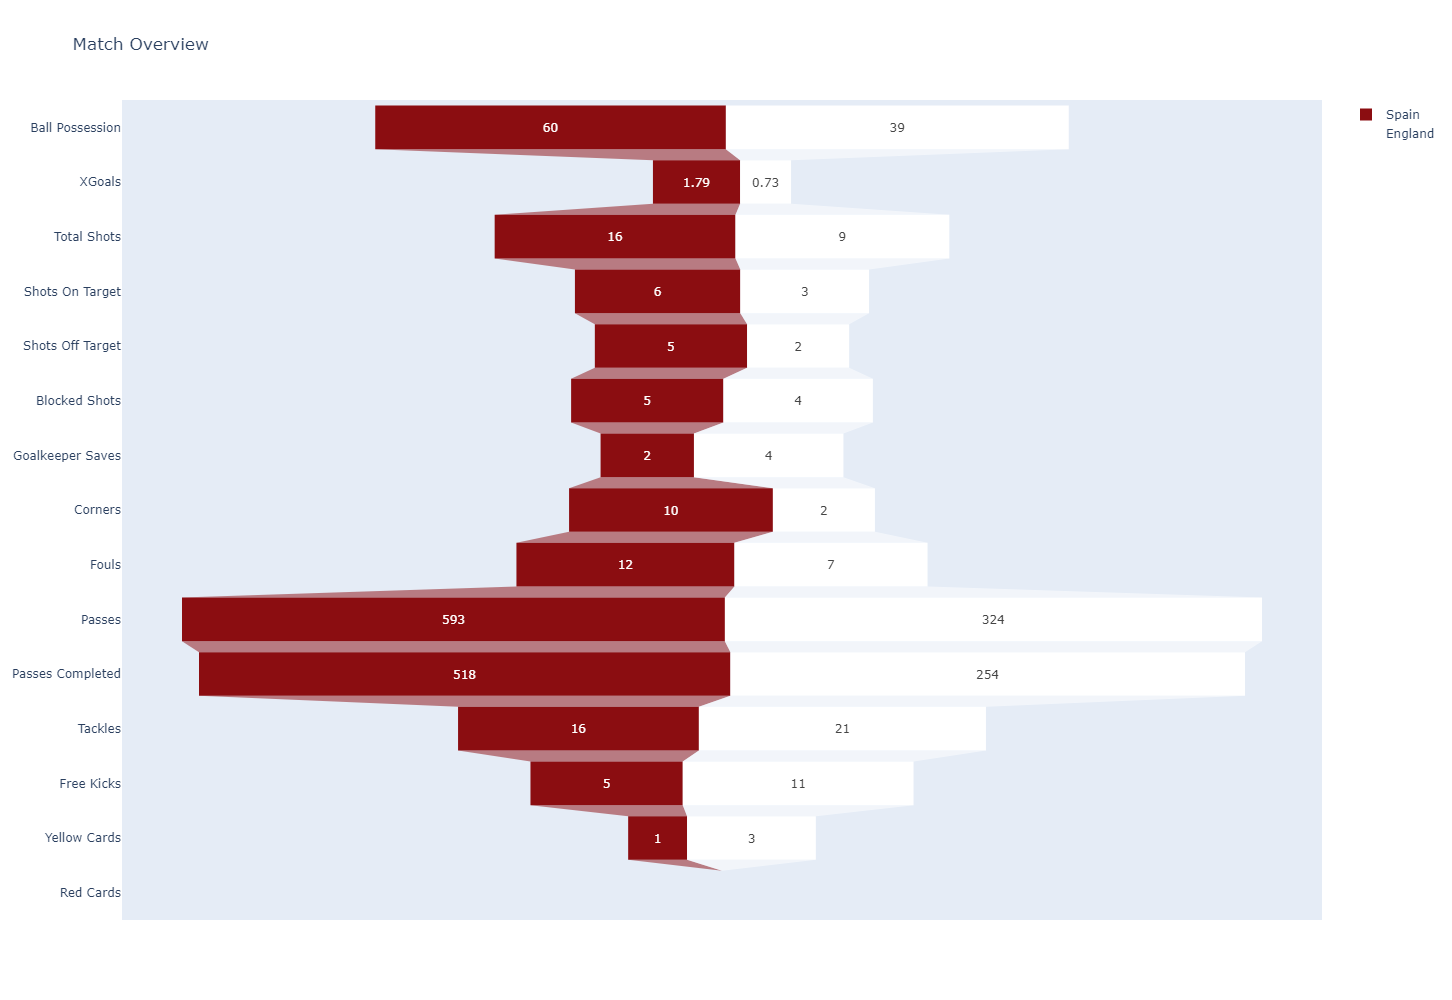

In [121]:
#set index to 0
match_details = match_details.reset_index(drop=True)

categories = df_transformed['Stat'].to_list()
home = df_transformed[str(match_details['home_team'][0])].to_list()
away = df_transformed[str(match_details['away_team'][0])].to_list()
# Normalize the values (convert to percentages)
home_total = np.sum(home)
away_total = np.sum(away)
# Apply logarithmic scaling for bar size
home_log_scaled = [np.log1p(x) / np.log1p(home_total) * 100 for x in home]
away_log_scaled = [np.log1p(x) / np.log1p(away_total) * 100 for x in away]


# Create the funnel chart
fig = go.Figure()
# Home trace
fig.add_trace(go.Funnel(
    name=str(match_details['home_team'][0]),
    y=categories,
    x=home_log_scaled,  # Use log-scaled values for visualization
    text=[format_value(value, category) for value, category in zip(home, categories)],  # Format based on category
    textinfo='text',
    marker=dict(color=home_color)
))
# Away trace
fig.add_trace(go.Funnel(
    name=str(match_details['away_team'][0]),
    y=categories,
    x=away_log_scaled,  # Use log-scaled values for visualization
    text=[format_value(value, category) for value, category in zip(away, categories)],  # Format based on category
    textinfo='text',
    marker=dict(color=away_color)
))
# Customize layout
fig.update_layout(
    title="Match Overview",
    height=1000  # Adjust height
)